In [ ]:
import onnxruntime as ort

ort.preload_dlls()
rt = ort.InferenceSession(
    "data/illustris/models/full_trained/decoder.onnx",
    providers=["CudaExecutionProvider"],
)

*************** EP Error ***************
EP Error Unknown Provider Type: CudaExecutionProvider when using ['CudaExecutionProvider']
Falling back to ['CPUExecutionProvider'] and retrying.
****************************************


/home/doserbd/git/SPACE_HPC_Visualization_Workshop/.venv/lib/python3.12/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CudaExecutionProvider' is not in available provider names.Available providers: 'TensorrtExecutionProvider, CUDAExecutionProvider, CPUExecutionProvider'
  warnings.warn(


In [8]:
import numpy as np

input = np.array([[0.0, 0.0, -1.0]], dtype=np.float32)
output = rt.run(None, {"x": input})[0]
print(output.shape, output.min(), output.max(), output.mean(), output.std())

(1, 3, 128, 128) -0.032322057 1.1527445 0.06391567 0.16024166


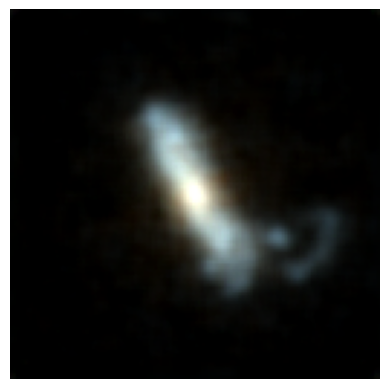

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

image = output[0]
image = np.clip(image.transpose(1, 2, 0), 0, 1)
image = (image * 255).astype(np.uint8)
image = Image.fromarray(image)

plt.imshow(image)
plt.axis("off")
plt.show()